# Random Forest
Random forest algorithm is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees.

- Random forest algorithm is an ensemble classification algorithm. **Ensemble classifier** means a group of classifiers. Instead of using only one classifier to predict the target, In ensemble, we use multiple classifiers to predict the target.

- In case, of random forest, these ensemble classifiers are the randomly created decision trees. Each decision tree is a single classifier and the target prediction is based on the **majority voting method**.
-  Every classifier will votes to one target class out of all the target classes and target class which got the most number of votes considered as the final predicted target class.
- A random forest uses a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
- The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
     - estimators_ : list of DecisionTreeClassifier(The collection of fitted sub-estimators.)
     
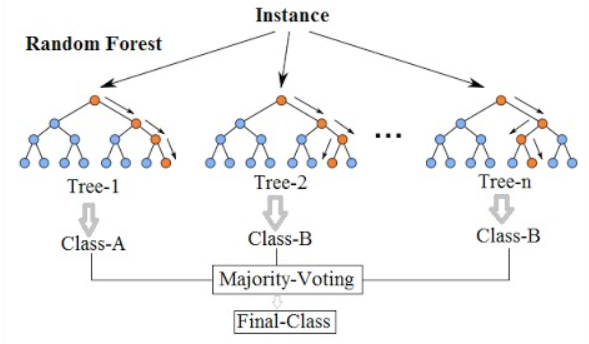

## Why Random Forest?
- The same random forest algorithm or the random forest classifier can use for both classification and the regression task.
- Random forest classifier will handle the missing values.
- When we have more trees in the forest, random forest classifier won’t overfit the model.
- Can model the random forest classifier for categorical values also.


In [1]:
# A simple Example to understand random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)


print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


## A Case Study : Prediction of health status of an individual based on life style & Socio econimic behaviour
The  dataset was collected by the Centers for Disease Control and Prevention

## Importing necessary libraries


In [2]:
import pandas as pd
import numpy as np
# Set random seed to ensure reproducible runs
RSEED = 50


In [3]:
d=pd.read_csv('F:\\ML & Data Visualization\\health\\2015.csv').sample(100000, random_state = RSEED)
d.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
383119,49.0,4.0,b'05192015',b'05',b'19',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
55536,9.0,9.0,b'09232015',b'09',b'23',b'2015',1100.0,2.015005e+09,2.015005e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
267093,34.0,10.0,b'11052015',b'11',b'05',b'2015',1100.0,2.015011e+09,2.015011e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
319092,41.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
420978,54.0,5.0,b'05112015',b'05',b'11',b'2015',1100.0,2.015004e+09,2.015004e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Descriptive statistics for each column
d.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,57609.0,57609.000000,8.0,57609.0,57609.000000,...,100000.000000,100000.000000,99335.000000,99335.000000,99335.000000,100000.000000,100000.000000,35749.000000,35749.000000,90135.000000
mean,29.930300,6.358540,1115.088000,2.015005e+09,2.015005e+09,1.0,1.000139,1.0,1.0,1.542120,...,3.493670,2.742620,2.715931,2.812241,3.649499,1.823680,1.886460,2.317016,2.427229,1.976014
std,16.042316,3.493865,35.793366,4.123617e+03,4.123617e+03,0.0,0.011783,0.0,0.0,0.498227,...,2.398441,2.449709,1.321496,1.351881,1.264406,2.359256,2.349788,2.544943,2.792445,1.452704
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [5]:
#Label Distribution
d['_RFHLTH'] = d['_RFHLTH'].replace({2: 0})
d= d.loc[d['_RFHLTH'].isin([0, 1])].copy()
d = d.rename(columns = {'_RFHLTH': 'label'})
d['label'].value_counts()

1.0    81140
0.0    18579
Name: label, dtype: int64

**The label imbalanced means that accuracy is not the best metric.**

In [6]:
d = d.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [7]:
from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(d.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(d, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [8]:
#Imputation of Missing values
#We'll fill in the missing values with the mean of the column. 
#It's important to note that we fill in missing values in the test set with the mean of columns in the training data. This is necessary because if we get new data, we'll have to use the training data to fill in any missing values.

train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [9]:
train.shape

(69803, 320)

In [10]:
test.shape

(29916, 320)

In [12]:
#Decision Tree on Real Data¶
#First, we'll train the decision tree on the data. Let's leave the depth unlimited and see if we get overfitting!

# Train tree
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(train, train_labels)


ValueError: could not convert string to float: "b'12022015'"

In [ ]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


In [ ]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

In [ ]:
#Feature Importances
#Finally, we can take a look at the features considered most important by the Decision Tree. The values are computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used.

fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()


In [ ]:
#Visualize Full Tree
# Save tree as dot file
export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = features, max_depth = 6,
                class_names = ['poor health', 'good health'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png'

### We can see that our model is extremely deep and has many nodes. To reduce the variance of our model, we could limit the maximum depth or the number of leaf nodes. Another method to reduce the variance is to use more trees, each one trained on a random sampling of the observations. This is where the random forest comes into play.

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

ValueError: could not convert string to float: "b'12022015'"

In [ ]:
#We can see how many nodes there are for each tree on average and the maximum depth of each tree. 
#There were 100 trees in the forest
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

### We see that each decision tree in the forest has many nodes and is extremely deep. However, even though each individual decision tree may overfit to a particular subset of the training data, the idea is that the overall random forest should have a reduced variance.

In [ ]:
# Results
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

In [ ]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

### The model still achieves perfect measures on the training data, but this time, the testing scores are much better. If we compare the ROC AUC, we see that the random forest does significantly better than a single decision tree.


In [ ]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

### Compared to the single decision tree, the model has fewer false postives although more false negatives. Overall, the random forest does significantly better than a single decision tree. 

In [ ]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)